In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [28]:
pip -q install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

In [29]:
import pandas as pd
import csv 
import numpy as np 
from sklearn.model_selection import train_test_split
from pyDeepInsight import ImageTransformer, LogScaler

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [19]:
# use panda to read csv and save X in numpy 
df = pd.read_csv('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deng-reads-RawCount-modefied.csv')
df = df.drop(df.columns[[0]], axis=1)
mt = df.to_numpy()
mt_X = mt.T

In [20]:
# Read csv get y 
fields =[]
# reading csv file
with open('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deng-reads-RawCount-modefied.csv', 'r',encoding='utf-8') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

    # extracting field names through first row
    #fields = csvreader.next()
    fields = next(csvreader)
    # extracting each data row one by one

del fields[0]
print(fields)
print(len(fields))
mt_Y = np.array(fields)

['16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '16cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '4cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', '8cell', 'zygote', 'zygote', 'zygote', 'zygote', 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    mt_X, mt_Y, test_size=0.2)

In [24]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(214, 21297) (54, 21297) (214,) (54,)


In [30]:
ln = LogScaler()
x_train_norm = ln.fit_transform(x_train)
x_test_norm = ln.transform(x_test)



In [31]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)

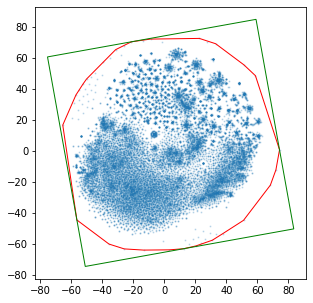

In [33]:
plt.figure(figsize=(5, 5))
_ = it.fit(x_train_norm, plot=True)

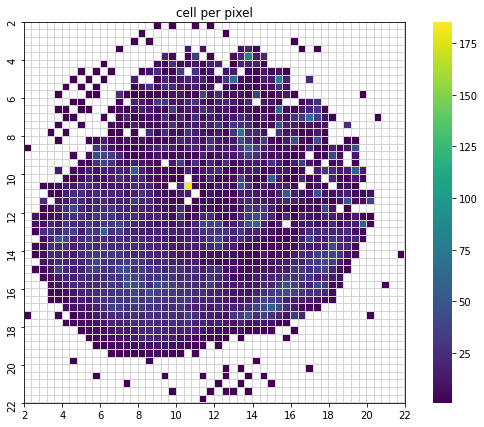

In [35]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("cell per pixel")

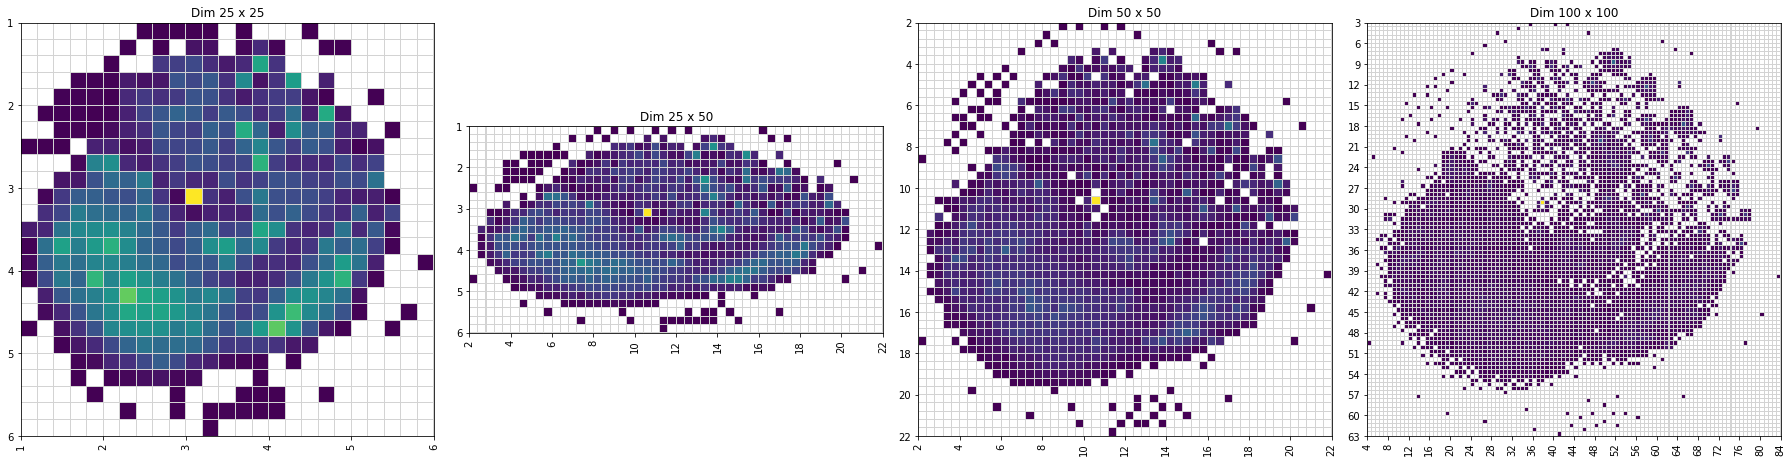

In [36]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)
    cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()    
    
it.pixels = 50

In [37]:
x_train_img = it.transform(x_train_norm)

In [38]:
x_train_img.shape

(214, 50, 50, 3)

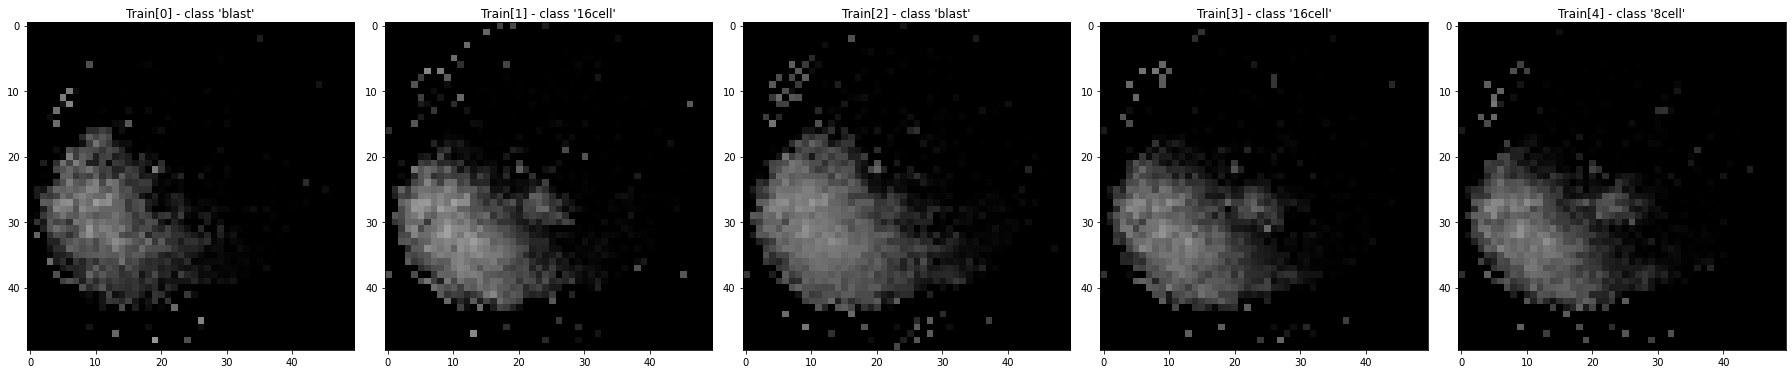

In [40]:
fig, ax = plt.subplots(1, 5, figsize=(25, 7))


for i in range(0,5):
    ax[i].imshow(x_train_img[i])
    ax[i].title.set_text("Train[{}] - class '{}'".format(i, y_train[i]))
plt.tight_layout()

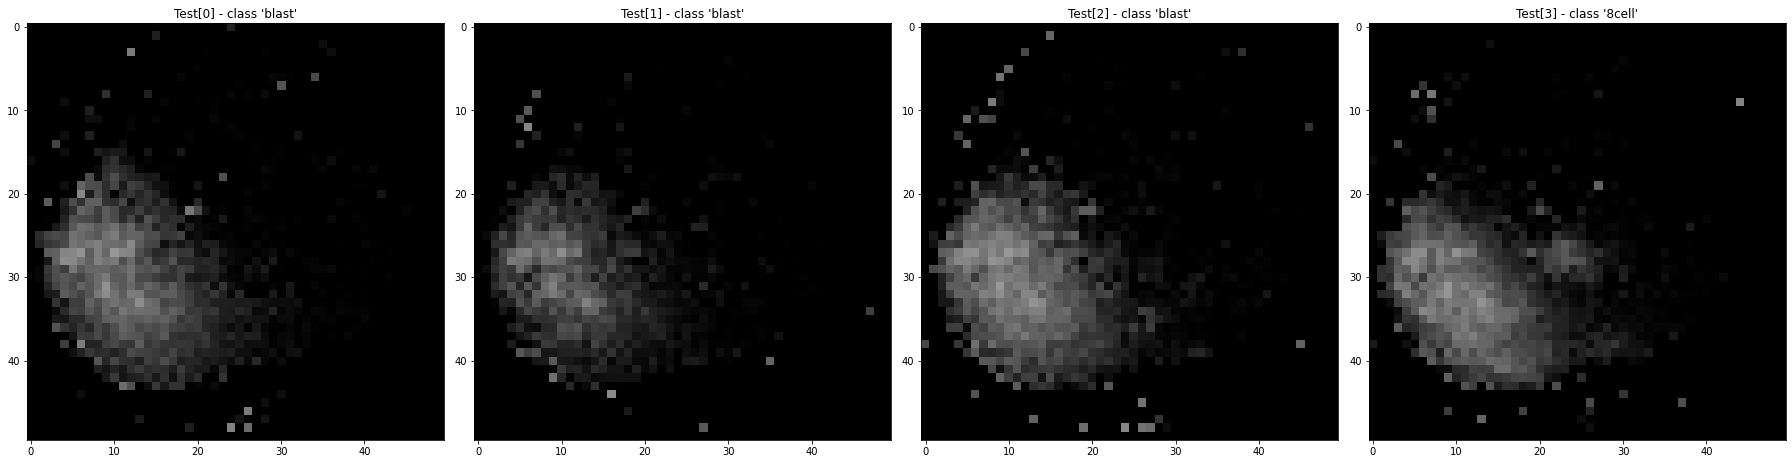

In [42]:
x_test_img = it.transform(x_test_norm)

fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(x_test_img[i])
    ax[i].title.set_text("Test[{}] - class '{}'".format(i, y_test[i]))
plt.tight_layout()

In [43]:
#celldata_deepIS
# save image 

np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/celldata_deepIS/x_train_img',x_train_img)
np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/celldata_deepIS/x_test_img',x_test_img)
np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/celldata_deepIS/y_train_img',y_train)
np.save('/content/drive/MyDrive/USYD/2021 S1/INFO4001/celldata_deepIS/y_test_img',y_test)